In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_default_dtype(torch.float64)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("./data_synthetic/synth_data_1var_exp.csv", index_col=0)
df

,X,y
0,0.000000,0.555041
1,0.067114,0.488022
2,0.134228,0.472649
3,0.201342,0.495478
4,0.268456,0.486232
...,...,...
145,9.731544,0.022817
146,9.798658,0.076458
147,9.865772,0.028670
148,9.932886,0.065511


In [5]:
X = torch.tensor(df["X"]).reshape(-1, 1)
y = torch.tensor(df["y"]).reshape(-1, 1)

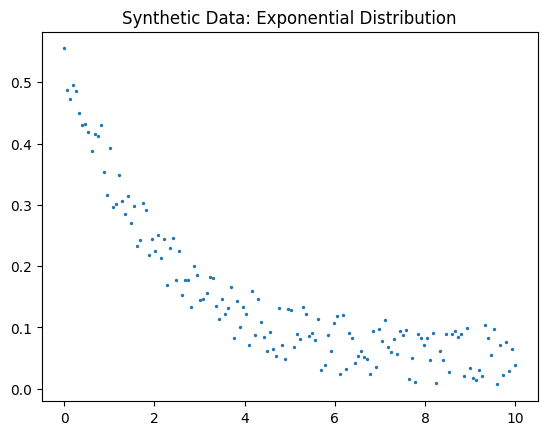

In [6]:
plt.scatter(X,y,s=2)
plt.title("Synthetic Data: Exponential Distribution")
plt.show()

In [7]:
class NN(nn.Module):

    def __init__(self):
        super(NN, self).__init__()
        self.hidden = nn.Linear(1, 20)
        self.relu = nn.ReLU()
        self.output = nn.Linear(20, 1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [8]:
model = NN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = torch.tensor(X_train).reshape(-1,1)
y_train = torch.tensor(y_train).reshape(-1,1)

C:\Users\kyle\AppData\Local\Temp\ipykernel_24064\1084140955.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).reshape(-1,1)
C:\Users\kyle\AppData\Local\Temp\ipykernel_24064\1084140955.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).reshape(-1,1)


In [10]:
num_epochs = 20000

for epoch in range(num_epochs):

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/20000], Loss: 1.11083273
Epoch [2/20000], Loss: 0.42311972
Epoch [3/20000], Loss: 0.08286719
Epoch [4/20000], Loss: 0.03259743
Epoch [5/20000], Loss: 0.14851021
Epoch [6/20000], Loss: 0.27374677
Epoch [7/20000], Loss: 0.31694668
Epoch [8/20000], Loss: 0.27540428
Epoch [9/20000], Loss: 0.18766397
Epoch [10/20000], Loss: 0.09634964
Epoch [11/20000], Loss: 0.03232093
Epoch [12/20000], Loss: 0.00920767
Epoch [13/20000], Loss: 0.02317522
Epoch [14/20000], Loss: 0.05738636
Epoch [15/20000], Loss: 0.09076486
Epoch [16/20000], Loss: 0.10740604
Epoch [17/20000], Loss: 0.10185165
Epoch [18/20000], Loss: 0.07860092
Epoch [19/20000], Loss: 0.04792162
Epoch [20/20000], Loss: 0.02083862
Epoch [21/20000], Loss: 0.00514435
Epoch [22/20000], Loss: 0.00324873
Epoch [23/20000], Loss: 0.01219155
Epoch [24/20000], Loss: 0.02548179
Epoch [25/20000], Loss: 0.03617435
Epoch [26/20000], Loss: 0.03965336
Epoch [27/20000], Loss: 0.03512380
Epoch [28/20000], Loss: 0.02511521
Epoch [29/20000], Loss: 0.013

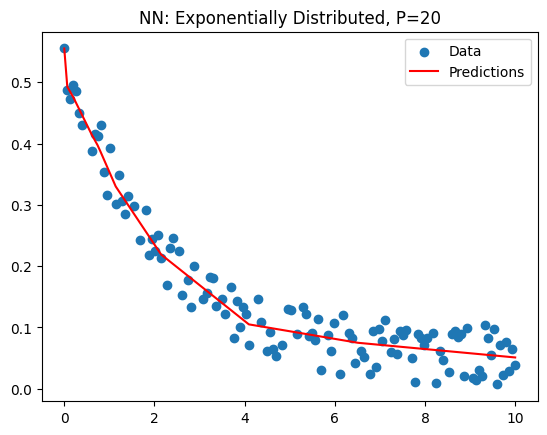

In [11]:
y_pred = model(X)

plt.scatter(X_train, y_train, label='Data')
# Sort X_test and y_pred based on X_test
sorted_indices = torch.argsort(X, dim=0).squeeze()
X_test_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted.detach().numpy(), label='Predictions', color='red')
plt.legend()
plt.title('NN: Exponentially Distributed, P=20')
plt.show()

In [12]:
nn.MSELoss()(y,y_pred).item()

0.0008299631149088372

In [13]:
torch.save(model.state_dict(), 'model_exp.pt')